In [24]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:

# Load the provided datasets to begin analyzing them
dataset1_path = 'D:\DemoPy\Mental Health Effects\Data\dataset1.csv'
dataset2_path = 'D:\DemoPy\Mental Health Effects\Data\dataset2.csv'
dataset3_path = 'D:\DemoPy\Mental Health Effects\Data\dataset3.csv'

# Load all datasets
dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)
dataset3 = pd.read_csv(dataset3_path)

# Displaying the head of each dataset to understand their structure
dataset1.head(), dataset2.head(), dataset3.head()


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:4: SyntaxWarning: invalid escape sequence '\D'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\432231071.py:2: SyntaxWarning: invalid escape sequence '\D'
  dataset1_path = 'D:\DemoPy\Mental Health Effects\Data\dataset1.csv'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\432231071.py:3: SyntaxWarning: invalid escape sequence '\D'
  dataset2_path = 'D:\DemoPy\Mental Health Effects\Data\dataset2.csv'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\432231071.py:4: SyntaxWarning: invalid escape sequence '\D'
  dataset3_path = 'D:\DemoPy\Mental Health Effects\Data\dataset3.csv'


(        ID  gender  minority  deprived
 0  1087360       0         0         0
 1  1088938       0         1         0
 2  1088953       0         1         0
 3  1088961       0         1         0
 4  1089147       0         1         0,
         ID  C_we  C_wk  G_we  G_wk  S_we  S_wk  T_we  T_wk
 0  1000002   0.5   0.5   0.0   0.0   1.0   0.5   1.0   0.5
 1  1000003   1.0   0.5   0.0   0.0   2.0   2.0   3.0   2.0
 2  1000004   3.0   1.0   2.0   0.0   3.0   2.0   3.0   2.0
 3  1000005   4.0   2.0   0.0   0.0   4.0   3.0   7.0   5.0
 4  1000006   1.0   0.5   0.0   0.0   2.0   2.0   1.0   0.5,
         ID  Optimistic_future  Usefull  Relax  Interest_people  Energy_spare  \
 0  1087360                  5        3      2                1             3   
 1  1094049                  2        3      3                2             3   
 2  1094067                  4        3      4                4             4   
 3  1097484                  3        3      3                3           

In [26]:
# Merging the datasets on the 'ID' column
merged_df = pd.merge(dataset1, dataset2, on="ID")
merged_df = pd.merge(merged_df, dataset3, on="ID")

# Create a new feature for total screen time (weekdays + weekends)
merged_df['Total_screen_time'] = (
    merged_df['C_wk'] + merged_df['C_we'] +
    merged_df['G_wk'] + merged_df['G_we'] +
    merged_df['S_wk'] + merged_df['S_we'] +
    merged_df['T_wk'] + merged_df['T_we']
)

# Check correlations between well-being scores and total screen time
correlation_matrix = merged_df.corr()

# Extract relevant correlations with well-being variables
wellbeing_columns = [
    'Optimistic_future', 'Usefull', 'Relax', 'Interest_people',
    'Energy_spare', 'Deal_problem', 'Thinking_clearly', 'Good_myself',
    'Close_people', 'Confident', 'Makeup_mind', 'Loved', 
    'Interest_newthings', 'Cheerfull'
]
correlation_with_wellbeing = correlation_matrix['Total_screen_time'][wellbeing_columns]

# Display the correlations
correlation_with_wellbeing.sort_values(ascending=False)


Interest_people      -0.023678
Relax                -0.030974
Close_people         -0.039021
Energy_spare         -0.039855
Makeup_mind          -0.071496
Interest_newthings   -0.076022
Optimistic_future    -0.078420
Confident            -0.084036
Loved                -0.091075
Cheerfull            -0.101836
Deal_problem         -0.103869
Usefull              -0.113839
Good_myself          -0.114822
Thinking_clearly     -0.143731
Name: Total_screen_time, dtype: float64

In [27]:
# Independent variables (screen time usage)
X_independent = merged_df[['C_wk', 'C_we', 'S_wk', 'S_we', 'T_wk', 'T_we', 'G_wk', 'G_we']]

# Dependent variables (emotional factors)
dependent_variables = ['Good_myself', 'Optimistic_future', 'Usefull', 'Relax', 'Interest_people',
                       'Energy_spare', 'Deal_problem', 'Thinking_clearly', 'Close_people', 
                       'Confident', 'Makeup_mind', 'Loved', 'Interest_newthings', 'Cheerfull']

# function to perform regression and return R² index
def perform_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

# Perform regression for each dependent variable
r2_scores = {}
for var in dependent_variables:
    y = merged_df[var]
    r2_scores[var] = perform_regression(X_independent, y)

# Display R² results for all dependent variables
r2_scores


{'Good_myself': 0.060491800173898436,
 'Optimistic_future': 0.005272280897672732,
 'Usefull': 0.022993503065390164,
 'Relax': 0.05081100187303211,
 'Interest_people': 0.0023057466051988884,
 'Energy_spare': 0.040331598902929255,
 'Deal_problem': 0.017953908566087362,
 'Thinking_clearly': 0.04531311986075148,
 'Close_people': 0.0032546773755303127,
 'Confident': 0.03148427071859561,
 'Makeup_mind': 0.015554861186255708,
 'Loved': 0.009344482269579513,
 'Interest_newthings': 0.01187772169022605,
 'Cheerfull': 0.02257658451179645}

In [28]:
wellbeing_columns = ['Good_myself', 'Optimistic_future', 'Usefull', 'Relax', 'Interest_people',
                     'Energy_spare', 'Deal_problem', 'Thinking_clearly',
                     'Close_people', 'Confident', 'Makeup_mind', 'Loved',
                     'Interest_newthings', 'Cheerfull']

# Store the R² result for each well-being variable
r2_scores = {}
for column in wellbeing_columns:
    y_wellbeing = merged_df[column]
    r2_score_wellbeing = perform_regression(X_independent, y_wellbeing)
    r2_scores[column] = r2_score_wellbeing

# Sort results in descending order of R²
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)

# Show R² results for all well-being variables
print("\nR² results for all well-being factors:")
for factor, r2 in sorted_r2_scores:
    print(f"Elements: {factor}, R² = {r2:.4f}")



R² results for all well-being factors:
Elements: Good_myself, R² = 0.0605
Elements: Relax, R² = 0.0508
Elements: Thinking_clearly, R² = 0.0453
Elements: Energy_spare, R² = 0.0403
Elements: Confident, R² = 0.0315
Elements: Usefull, R² = 0.0230
Elements: Cheerfull, R² = 0.0226
Elements: Deal_problem, R² = 0.0180
Elements: Makeup_mind, R² = 0.0156
Elements: Interest_newthings, R² = 0.0119
Elements: Loved, R² = 0.0093
Elements: Optimistic_future, R² = 0.0053
Elements: Close_people, R² = 0.0033
Elements: Interest_people, R² = 0.0023


In [29]:
y_confident = merged_df['Confident']
y_loved = merged_df['Loved']
y_cheerfull = merged_df['Cheerfull']
y_good_myself = merged_df['Good_myself']


# Functions for building models and evaluating performance
def train_and_evaluate_model(X, y, variable_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediction on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² for training and test sets
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    print(f"{variable_name} - R² train: {r2_train:.4f}, R² test: {r2_test:.4f}")
    return model


# Do for dependent variables and save model
model_confident = train_and_evaluate_model(X_independent, y_confident, "Confident")
model_loved = train_and_evaluate_model(X_independent, y_loved, "Loved")
model_cheerfull = train_and_evaluate_model(X_independent, y_cheerfull, "Cheerfull")
model_good_myself = train_and_evaluate_model(X_independent, y_good_myself, "Good about oneself")


Confident - R² train: 0.0348, R² test: 0.0315
Loved - R² train: 0.0110, R² test: 0.0093
Cheerfull - R² train: 0.0241, R² test: 0.0226
Good about oneself - R² train: 0.0635, R² test: 0.0605


#### Here I use Random Forest Regressor to reduce the MSE index with the hope that I can reduce the R index so that the model will be more feasible, but when I reduce the MSE index, the R index is also very low. Therefore, this approach is still Underfit.

In [30]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Bước 1: Tải các tập dữ liệu
dataset1 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset1.csv')  
dataset2 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset2.csv')  
dataset3 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset3.csv')  


merged_data = pd.merge(pd.merge(dataset1, dataset2, on='ID'), dataset3, on='ID')


merged_data_filled = merged_data.fillna(merged_data.mean())


merged_data_filled['total_weekdays'] = merged_data_filled['C_wk'] + merged_data_filled['S_wk'] + merged_data_filled['T_wk'] + merged_data_filled['G_wk']
merged_data_filled['total_weekends'] = merged_data_filled['C_we'] + merged_data_filled['S_we'] + merged_data_filled['T_we'] + merged_data_filled['G_we']

# Using only 2 new independent variables: total weekday time and total weekend time
features = merged_data_filled[['total_weekdays', 'total_weekends']]


scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

well_being_groups = [
    ['Good_myself', 'Optimistic_future', 'Usefull', 'Relax', 'Interest_people',
                     'Energy_spare', 'Deal_problem', 'Thinking_clearly',
                     'Close_people', 'Confident', 'Makeup_mind', 'Loved',
                     'Interest_newthings', 'Cheerfull']
]

# Perform k-fold cross-validation with RandomForestRegressor for each group of Y variables
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

for i, group in enumerate(well_being_groups):

    y = merged_data_filled[group].mean(axis=1)
    
    # Using cross_val_score to calculate R² and MSE in k-fold cross-validation
    r2_scorer = make_scorer(r2_score)
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    r2_scores = cross_val_score(rf_model, features_scaled, y, cv=kf, scoring=r2_scorer)
    mse_scores = cross_val_score(rf_model, features_scaled, y, cv=kf, scoring=mse_scorer)
    
    print(f'Group {i+1} ({", ".join(group)}):')
    print(f'  Average R-squared (R²): {np.mean(r2_scores)}')
    print(f'  Average Mean Squared Error (MSE): {-np.mean(mse_scores)}\n')


<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\731730694.py:9: SyntaxWarning: invalid escape sequence '\D'
  dataset1 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset1.csv')
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\731730694.py:10: SyntaxWarning: invalid escape sequence '\D'
  dataset2 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset2.csv')
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\731730694.py:11: SyntaxWarning: invalid escape sequence '\D'
  dataset3 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset3.csv')


Group 1 (Good_myself, Optimistic_future, Usefull, Relax, Interest_people, Energy_spare, Deal_problem, Thinking_clearly, Close_people, Confident, Makeup_mind, Loved, Interest_newthings, Cheerfull):
  Average R-squared (R²): -0.0005043774075538909
  Average Mean Squared Error (MSE): 0.4639748654855251


In this section, I built a linear regression model hoping to find a special index but on the contrary, the MSE index is very high. Therefore, the model is not suitable but in the plot chart, there is a more feasible index which is TV because it appears more than not for other types of screentime.

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\802011659.py:9: SyntaxWarning: invalid escape sequence '\D'
  dataset2 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset2.csv')
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\802011659.py:10: SyntaxWarning: invalid escape sequence '\D'
  dataset3 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset3.csv')
D:\DemoPy\Mental Health Effects\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


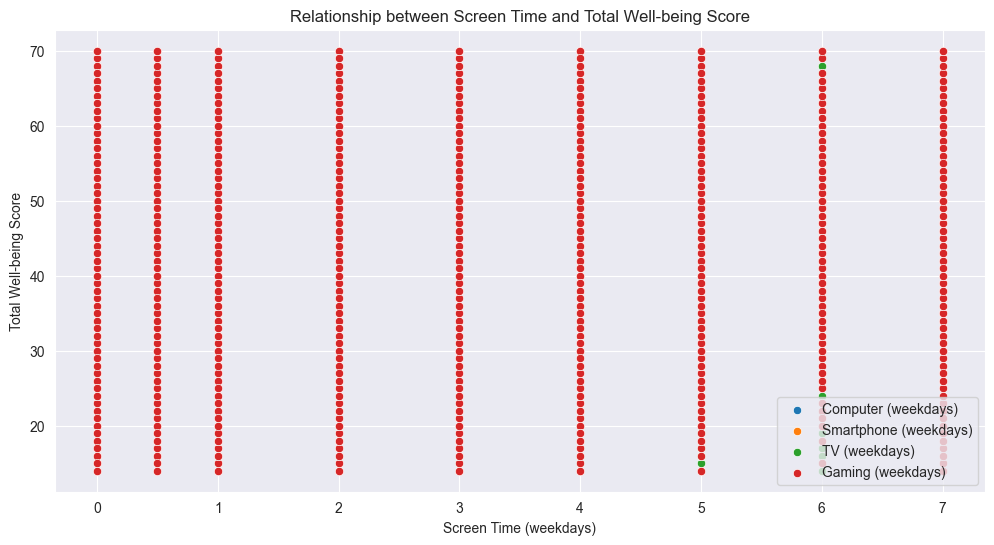

R-squared: 0.035627135622814166
Mean Squared Error: 88.46741491034011


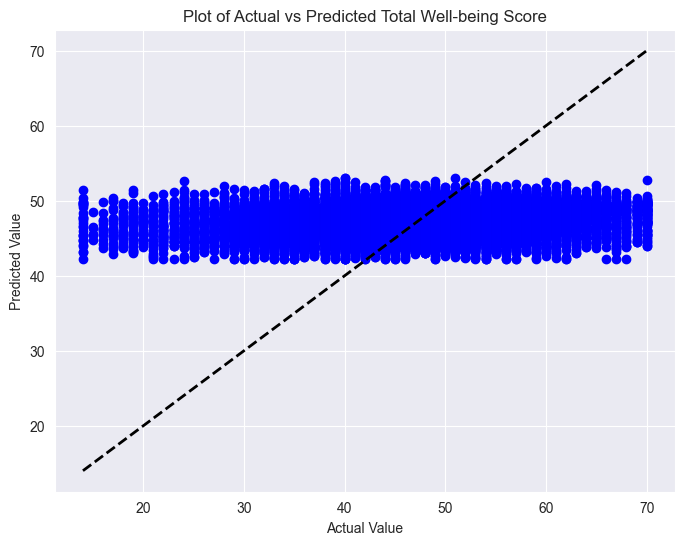

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Read datasets
dataset2 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset2.csv')  
dataset3 = pd.read_csv('D:\DemoPy\Mental Health Effects\Data\dataset3.csv')  

# Merge datasets
merged_data = pd.merge(dataset2, dataset3, on='ID')

# Fill missing values with the mean
cleaned_data = merged_data.fillna(merged_data.mean())

# List of well-being columns
well_being_columns = ['Good_myself', 'Optimistic_future', 'Usefull', 'Relax', 'Interest_people',
                      'Energy_spare', 'Deal_problem', 'Thinking_clearly', 'Close_people', 
                      'Confident', 'Makeup_mind', 'Loved', 'Interest_newthings', 'Cheerfull']

# Calculate total well-being score
cleaned_data['total_well_being'] = cleaned_data[well_being_columns].sum(axis=1)

# Scatter plot to visualize relationships between screen time and well-being
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x='C_wk', y='total_well_being', label='Computer (weekdays)')
sns.scatterplot(data=cleaned_data, x='S_wk', y='total_well_being', label='Smartphone (weekdays)')
sns.scatterplot(data=cleaned_data, x='T_wk', y='total_well_being', label='TV (weekdays)')
sns.scatterplot(data=cleaned_data, x='G_wk', y='total_well_being', label='Gaming (weekdays)')
plt.title('Relationship between Screen Time and Total Well-being Score')
plt.xlabel('Screen Time (weekdays)')
plt.ylabel('Total Well-being Score')
plt.legend()
plt.show()

# Build a linear regression model to predict total well-being score
# Identify the independent variables (screen time)
X = cleaned_data[['C_wk', 'S_wk', 'T_wk', 'G_wk']]  

# Identify the dependent variable (total well-being score)
y = cleaned_data['total_well_being']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Plot of Actual vs Predicted Total Well-being Score')
plt.show()


#### Here I tried to implement feature engineering to remove the highly correlative variables. Then I found out that the variable is Smartphone screen time. However, as shown in the heatmap, the correlation indicators are not feasible, especially the R index, they are not very prominent. Therefore, this is the last way for me to eliminate this dataset from the underfit group is not possible.

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:10: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\1411534653.py:9: SyntaxWarning: invalid escape sequence '\D'
  dataset1_path = 'D:\DemoPy\Mental Health Effects\Data\dataset1.csv'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\1411534653.py:10: SyntaxWarning: invalid escape sequence '\D'
  dataset2_path = 'D:\DemoPy\Mental Health Effects\Data\dataset2.csv'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\1411534653.py:11: SyntaxWarning: invalid escape sequence '\D'
  dataset3_path = 'D:\DemoPy\Mental Health Effects\Data\dataset3.csv'


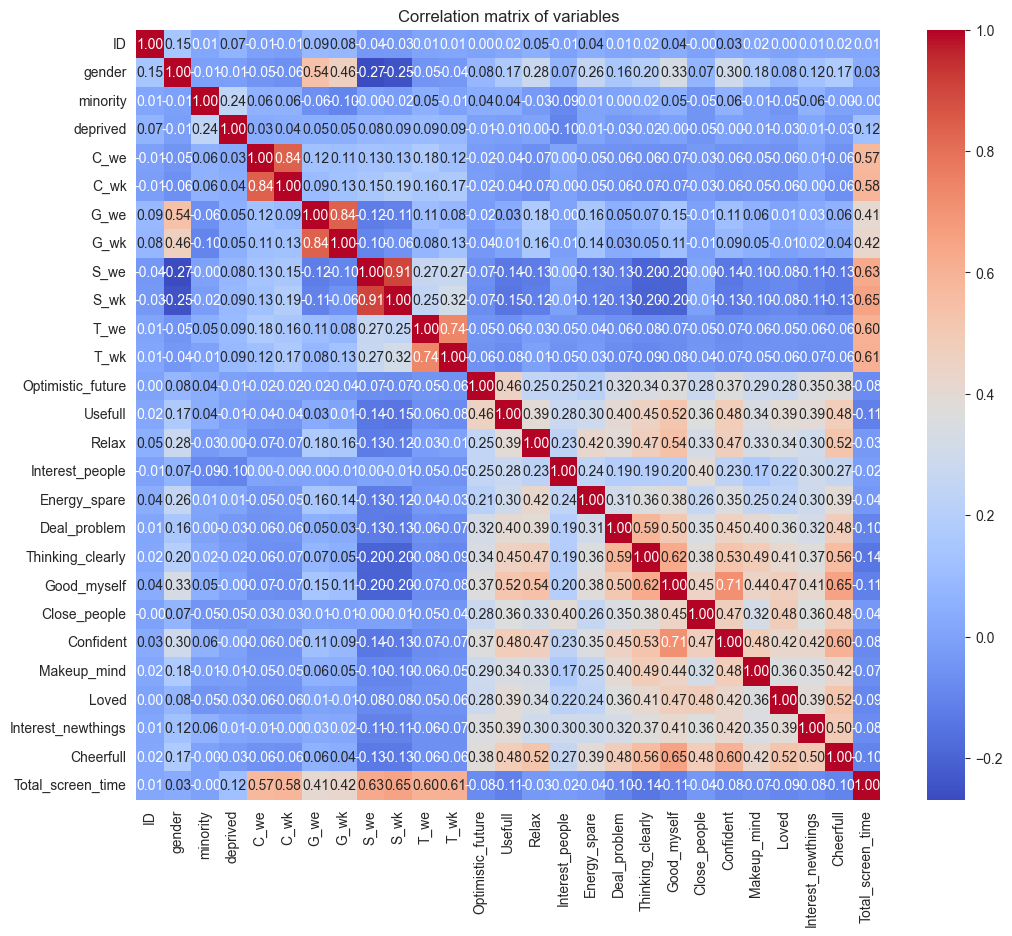

C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\1411534653.py:9: SyntaxWarning: invalid escape sequence '\D'
  dataset1_path = 'D:\DemoPy\Mental Health Effects\Data\dataset1.csv'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\1411534653.py:10: SyntaxWarning: invalid escape sequence '\D'
  dataset2_path = 'D:\DemoPy\Mental Health Effects\Data\dataset2.csv'
C:\Users\doanx\AppData\Local\Temp\ipykernel_15588\1411534653.py:11: SyntaxWarning: invalid escape sequence '\D'
  dataset3_path = 'D:\DemoPy\Mental Health Effects\Data\dataset3.csv'


KeyError: "['S_wk'] not in index"

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

dataset1_path = 'D:\DemoPy\Mental Health Effects\Data\dataset1.csv'
dataset2_path = 'D:\DemoPy\Mental Health Effects\Data\dataset2.csv'
dataset3_path = 'D:\DemoPy\Mental Health Effects\Data\dataset3.csv'

dataset1 = pd.read_csv(dataset1_path)
dataset2 = pd.read_csv(dataset2_path)
dataset3 = pd.read_csv(dataset3_path)

merged_df = pd.merge(dataset1, dataset2, on="ID")
merged_df = pd.merge(merged_df, dataset3, on="ID")

cleaned_data = merged_df.fillna(merged_df.mean())

cleaned_data['Total_screen_time'] = (
    cleaned_data['C_wk'] + cleaned_data['C_we'] +
    cleaned_data['G_wk'] + cleaned_data['G_we'] +
    cleaned_data['S_wk'] + cleaned_data['S_we'] +
    cleaned_data['T_wk'] + cleaned_data['T_we']
)

correlation_matrix = cleaned_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix of variables')
plt.show()

# Remove highly correlated variables (with threshold > 0.9)
def remove_highly_correlated_features(df, threshold=0.9):
    correlation_matrix = df.corr().abs()
    upper_triangle = correlation_matrix.where(
        np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return df.drop(columns=to_drop)

# Apply highly correlated variable removal
cleaned_data_reduced = remove_highly_correlated_features(cleaned_data)

# Step 4: Test the new variables
X_independent = cleaned_data_reduced[['C_wk', 'C_we', 'S_wk', 'S_we', 'T_wk', 'T_we', 'G_wk', 'G_we', 'Total_screen_time']]

dependent_variables = ['Good_myself', 'Optimistic_future', 'Usefull', 'Relax', 'Interest_people',
                       'Energy_spare', 'Deal_problem', 'Thinking_clearly', 'Close_people', 
                       'Confident', 'Makeup_mind', 'Loved', 'Interest_newthings', 'Cheerfull']

def perform_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg_model = LinearRegression()
    reg_model.fit(X_train, y_train)
    y_pred = reg_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    return r2

r2_scores = {}
for var in dependent_variables:
    y = cleaned_data_reduced[var]
    r2_scores[var] = perform_regression(X_independent, y)

print("\nR² results for all well-being factors:")
sorted_r2_scores = sorted(r2_scores.items(), key=lambda x: x[1], reverse=True)
for factor, r2 in sorted_r2_scores:
    print(f"Factor: {factor}, R² = {r2:.4f}")

# Visualize the relationship between screen time and a specific happiness factor (e.g., Good_myself)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data_reduced, x='Total_screen_time', y='Good_myself', label='Total Screen Time')
plt.title('Relationship between Total Screen Time and Happiness Score "Good_myself"')
plt.xlabel('Total Screen Time')
plt.ylabel('Happiness Score "Good_myself"')
plt.legend()
plt.show()


#### S_Wk is not index because I removed it

In [33]:

def remove_highly_correlated_features(df, threshold=0.9):
    correlation_matrix = df.corr().abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return to_drop

# Áp dụng hàm để tìm các biến bị loại bỏ
dropped_columns = remove_highly_correlated_features(cleaned_data)

# Hiển thị các biến đã bị loại bỏ
print("Variables removed due to high correlation:")
print(dropped_columns)


Variables removed due to high correlation:
['S_wk']
